In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
! pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [52]:
data = pd.read_csv("train.csv")

In [53]:
data.head(100)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,0,0,23143.83,1,1.000375,988439.77,NaN,NaN,0.999694,140039.77,1.001055,483973.71,1.0,-2.470016,0,0_0_98
96,99,0,0,3365706.48,1,0.999360,3893856.98,NaN,NaN,0.999851,43958.46,1.000097,28525.00,1.0,13.680458,0,0_0_99
97,100,0,0,0.00,0,1.000209,80691.87,NaN,NaN,0.999839,4807.78,1.000209,6241.62,1.0,-5.229711,0,0_0_100
98,101,0,0,139778.86,-1,0.999537,1085206.20,NaN,NaN,0.999146,11510.40,1.001138,15377.80,1.0,8.449554,0,0_0_101


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [55]:
data.isnull().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

drop 88 target vals, for 220 vals, fill mean

In [56]:
data.nunique()

stock_id                       200
date_id                        481
seconds_in_bucket               55
imbalance_size             2971863
imbalance_buy_sell_flag          3
reference_price              28741
matched_size               2948862
far_price                    95739
near_price                   84625
bid_price                    28313
bid_size                   2591773
ask_price                    28266
ask_size                   2623254
wap                          31506
target                       15934
time_id                      26455
row_id                     5237980
dtype: int64

In [57]:
df = data.sort_values(by = ["stock_id"])
df.tail()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
3489979,199,322,40,2834051.32,1,0.999842,7856549.71,NaN,NaN,0.999514,63968.02,0.999842,77012.50,0.999663,7.109642,17714,322_40_199
3490179,199,322,50,2834051.32,1,0.999842,7856549.71,NaN,NaN,0.999514,85859.84,0.999842,55662.50,0.999713,13.129711,17715,322_50_199
1056242,199,98,530,1056329.57,1,1.002979,20411272.42,1.004667,1.003823,1.002557,171024.48,1.002979,195698.41,1.002754,6.090403,5443,98_530_199
4648979,199,427,240,2535153.87,1,1.002560,7987674.68,NaN,NaN,1.002216,157322.55,1.002560,32950.80,1.002501,3.180504,23509,427_240_199
5237979,199,480,540,1884285.71,-1,1.002129,24073677.32,1.000859,1.001494,1.002129,250081.44,1.002447,300167.56,1.002274,-6.530285,26454,480_540_199


<Axes: >

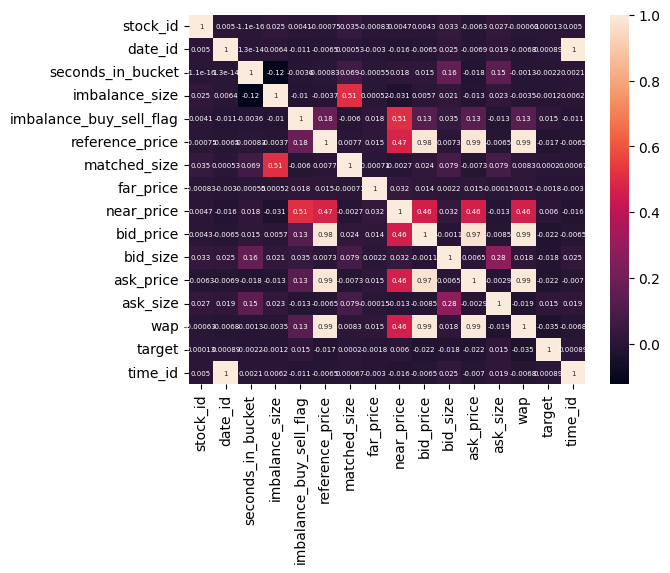

In [58]:
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 5})

In [59]:
data.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02,2.645400e+04


In [60]:
num_dates_per_stock = data.groupby('stock_id')['date_id'].nunique()
stock_ids_with_incomplete_data = num_dates_per_stock.loc[lambda x: x < x.max()].index.tolist()
print("Stock IDs with incomplete data:", stock_ids_with_incomplete_data)
num_dates_per_stock.loc[lambda x: x.index.isin(stock_ids_with_incomplete_data)].sort_values()

Stock IDs with incomplete data: [69, 73, 78, 79, 99, 102, 135, 150, 153, 156, 199]


stock_id
102    186
135    290
79     300
199    393
153    411
150    422
69     444
156    444
78     477
73     480
99     480
Name: date_id, dtype: int64

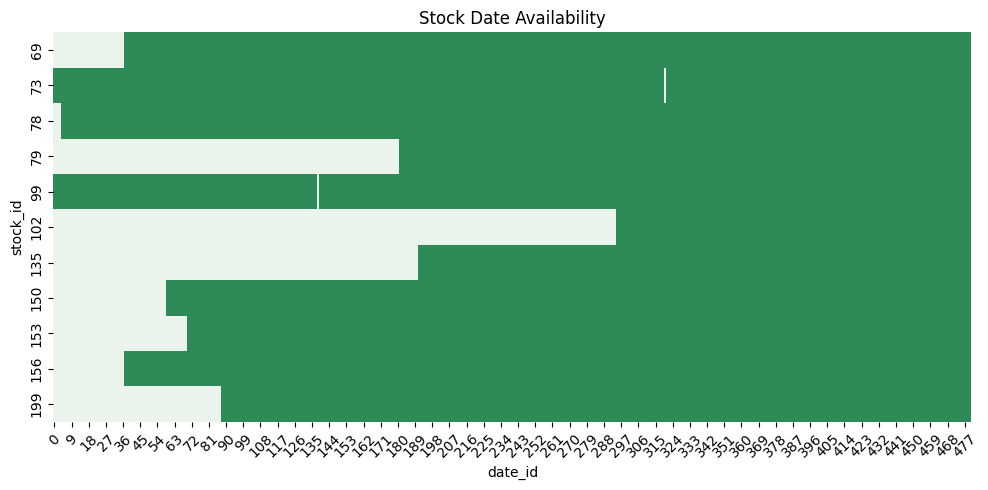

In [61]:
# Filter the DataFrame for stocks with incomplete data
df_incomplete = data[data['stock_id'].isin(stock_ids_with_incomplete_data)]

# Create a pivot table to show date availability and fill NaN values with 0
df_incomplete = pd.crosstab(df_incomplete['stock_id'], df_incomplete['date_id']).fillna(0)

# Create a heatmap visualization
plt.figure(figsize=(10, 5))
sns.heatmap(df_incomplete, cbar=False, cmap=sns.light_palette("seagreen", as_cmap=True))
plt.title("Stock Date Availability")
plt.xticks(rotation=45)
plt.tight_layout()
